In [11]:
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [12]:
datos = pd.read_csv('./altura_peso_edad.csv')
datos.head(10)

,Altura,Peso,Edad
0,1.82,88,57
1,1.75,78,40
2,1.80,76,37
3,1.70,68,55
4,1.68,65,63
5,1.75,72,50
6,1.85,80,27
7,1.70,65,52
8,1.82,90,65
9,1.67,60,47


In [13]:
# Prepararamos los datos para el primer modelo (solo altura)
X = datos[['Altura', 'Edad']].values
y = datos['Peso'].values

# Dividimos los datos en 75% entrenamiento y 25% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Creamos el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X)

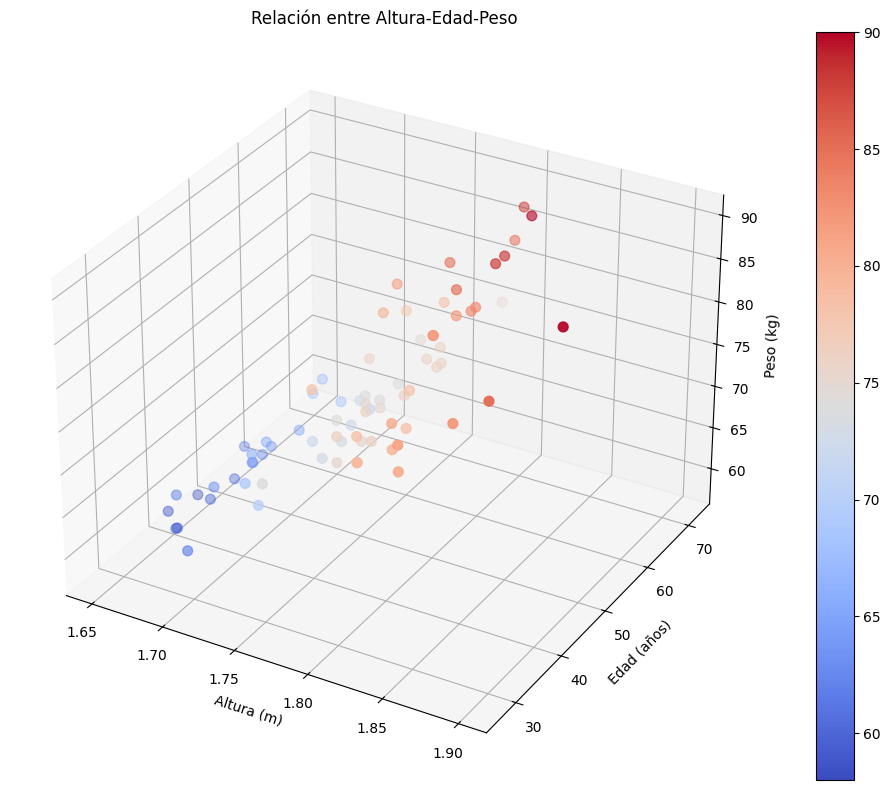

In [14]:
# Creamos una visualización 3D para mostrar la relación entre las variables
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(datos['Altura'],
                    datos['Edad'],
                    datos['Peso'],
                    c=datos['Peso'],
                    cmap='coolwarm',
                    s=50)

ax.set_xlabel('Altura (m)')
ax.set_ylabel('Edad (años)')
ax.set_zlabel('Peso (kg)')
plt.colorbar(scatter)
plt.title('Relación entre Altura-Edad-Peso')
plt.tight_layout()
plt.show()

In [15]:
alturaErnestinaCantarero = 1.54
edadErnestinaCantarero = 42
prediccionPeso = modelo.predict([[alturaErnestinaCantarero, edadErnestinaCantarero]])
print(f"La altura de Ernestina Cantarero es {alturaErnestinaCantarero} m, su edad es {edadErnestinaCantarero} años y su peso aprox. de ella es {prediccionPeso} kg.")

La altura de Ernestina Cantarero es 1.54 m, su edad es 42 años y su peso aprox. de ella es [43.81530059] kg.


In [16]:
alturaEvelynRauda = 1.53
edadEvelynRauda = 27
prediccionPeso = modelo.predict([[alturaEvelynRauda, edadEvelynRauda]])
print(f"La altura de Evelyn Rauda es {alturaEvelynRauda} m, su edad es {edadEvelynRauda} años y su peso aprox. de ella es {prediccionPeso} kg.")

La altura de Evelyn Rauda es 1.53 m, su edad es 27 años y su peso aprox. de ella es [39.20613453] kg.


In [17]:
alturaLilyCollins = 1.65
edadLilyCollins = 35
prediccionPeso = modelo.predict([[alturaLilyCollins, edadLilyCollins]])
print(f"La altura de Lily Collins es {alturaLilyCollins} m, su edad es {edadLilyCollins} años y su peso aprox. de ella es {prediccionPeso} kg.")

La altura de Lily Collins es 1.65 m, su edad es 35 años y su peso aprox. de ella es [56.79477087] kg.


In [18]:
alturaDonaldTrump = 1.9
edadDonaldTrump = 78
prediccionPeso = modelo.predict([[alturaDonaldTrump, edadDonaldTrump]])
print(f"La altura de Donald Trump es {alturaDonaldTrump} m, su edad es {edadDonaldTrump} años y su peso aprox. de él es {prediccionPeso} kg.")

La altura de Donald Trump es 1.9 m, su edad es 78 años y su peso aprox. de él es [99.21293214] kg.


In [19]:
modelo.score(X_train, y_train) # Puntaje del modelo

0.9130405292805721

In [20]:
print(f"Peso: {modelo.coef_}")
print(f"Sesgo: {modelo.intercept_}")

Peso: [131.95128869   0.21931021]
Sesgo: -168.60071287533208


**El nuevo modelo superó al de Peso-Altura con una diferencia no muy amplia, pero sí significativa. La inclusión de la edad parece haber mejorado la correlación entre las características. Sin embargo, al compararlo con datos reales, se observan variaciones en la precisión.**

**Por ejemplo, Ernestina pesa 48.0808 kg, pero el modelo predijo 43.8153 kg, alejándose un poco del valor real. En el caso de Evelyn, cuyo peso es de 82.1002 kg, la predicción fue de 39.2061 kg, lo que indica un error considerable.**

**Al evaluar el modelo con datos de personas famosas, los resultados fueron más precisos. Para Lily Collins, cuyo peso es de 54 kg, la predicción fue de 56.7948 kg, bastante cercana al valor real. En el caso de Donald Trump, con un peso real de 98 kg, el modelo estimó 99.2129 kg, mostrando una buena precisión.**

**En general, el modelo ha mejorado, pero su exactitud sigue variando según cada individuo.**